In [1]:
# Imports
import os
import sys
import glob

# Third-party imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Local imports
sys.path.append("/home/users/benhutch/skill-maps")
import dictionaries as dicts

# # Import functions from skill-maps
sys.path.append("/home/users/benhutch/skill-maps/python")
# import functions as fnc
import plotting_functions as plt_fnc

# Import functions from plot_init_benefit
sys.path.append("/home/users/benhutch/skill-maps/rose-suite-matching")
import plot_init_benefit as pib_fnc

In [3]:
# Set up the arguments
variable = "tas"
region = "global"
season = "DJFM"
forecast_range = "2-9"
method = "lagged"
no_bootstraps = 10 # test case
bootstrap_base_dir = "/gws/nopw/j04/canari/users/benhutch/bootstrapping"
plots_dir = "/gws/nopw/j04/canari/users/benhutch/plots"

# Define the seasons_list
seasons_list = ["DJFM", "MAM", "JJA", "SON"]
method_list = ["raw", "lagged", "nao-matched"]

In [4]:
# # Create an empty list to store the paths
# paths_list = []

# # Loop over the seasons and generate the paths
# for season in seasons_list:
#     # Form the path
#     path = f"{bootstrap_base_dir}/{variable}/{region}/{season}/" + \
#                 f"{forecast_range}/{method}/no_bootstraps_{no_bootstraps}"

#     # Append the path to the list
#     paths_list.append(path)

#     # Print the path
#     print(path)

#     # Check if the path exists
#     if os.path.exists(path):
#         print("Path exists")

#     # print the files in the path
#     files = glob.glob(f"{path}/*")

#     # Print the files
#     print(files)

/gws/nopw/j04/canari/users/benhutch/bootstrapping/rsds/global/DJFM/2-9/raw/no_bootstraps_10
Path exists
['/gws/nopw/j04/canari/users/benhutch/bootstrapping/rsds/global/DJFM/2-9/raw/no_bootstraps_10/corr10_max_rsds_global_DJFM_2-9.npy', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/rsds/global/DJFM/2-9/raw/no_bootstraps_10/corr10_min_rsds_global_DJFM_2-9.npy', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/rsds/global/DJFM/2-9/raw/no_bootstraps_10/corr10_p_rsds_global_DJFM_2-9.npy', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/rsds/global/DJFM/2-9/raw/no_bootstraps_10/corr10_rsds_global_DJFM_2-9.npy', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/rsds/global/DJFM/2-9/raw/no_bootstraps_10/corr1_max_rsds_global_DJFM_2-9.npy', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/rsds/global/DJFM/2-9/raw/no_bootstraps_10/corr1_min_rsds_global_DJFM_2-9.npy', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/rsds/global/DJFM/2-9/raw/no_bootstraps_10/corr1_p_rsds_global_DJFM

In [4]:
# Form the paths for the data using the method_list
paths_list = []

# Loop over the methods and generate the paths
for method in method_list:
    path = f"{bootstrap_base_dir}/{variable}/{region}/{season}/" + \
                f"{forecast_range}/{method}/no_bootstraps_{no_bootstraps}"
    
    # Append the path to the list
    paths_list.append(path)

    # Check if the path exists
    if os.path.exists(path):
        print("Path exists")

    # print the files in the path
    files = glob.glob(f"{path}/*")

    # Print the files
    print(files)

Path exists
['/gws/nopw/j04/canari/users/benhutch/bootstrapping/tas/global/DJFM/2-9/raw/no_bootstraps_10/corr10_max_tas_global_DJFM_2-9.npy', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/tas/global/DJFM/2-9/raw/no_bootstraps_10/corr10_min_tas_global_DJFM_2-9.npy', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/tas/global/DJFM/2-9/raw/no_bootstraps_10/corr10_p_tas_global_DJFM_2-9.npy', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/tas/global/DJFM/2-9/raw/no_bootstraps_10/corr10_tas_global_DJFM_2-9.npy', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/tas/global/DJFM/2-9/raw/no_bootstraps_10/corr1_max_tas_global_DJFM_2-9.npy', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/tas/global/DJFM/2-9/raw/no_bootstraps_10/corr1_min_tas_global_DJFM_2-9.npy', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/tas/global/DJFM/2-9/raw/no_bootstraps_10/corr1_p_tas_global_DJFM_2-9.npy', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/tas/global/DJFM/2-9/raw/no_bootstraps_10/cor

In [5]:
# print(paths_list)

['/gws/nopw/j04/canari/users/benhutch/bootstrapping/rsds/global/DJFM/2-9/raw/no_bootstraps_10', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/rsds/global/MAM/2-9/raw/no_bootstraps_10', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/rsds/global/JJA/2-9/raw/no_bootstraps_10', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/rsds/global/SON/2-9/raw/no_bootstraps_10']


In [5]:
# Create an empty list to store the dictionaries
values_list = []

# Loop over the paths and extract the values for each path
for path in paths_list:
    # Extract the values from the .txt files
    values = pib_fnc.extract_values_from_txt(path, variable)

    # Append the resulting dictionary to the list
    values_list.append(values)

# Print the list of dictionaries
print(values_list)


['/gws/nopw/j04/canari/users/benhutch/bootstrapping/tas/global/DJFM/2-9/raw/no_bootstraps_10/nens1_tas_global_DJFM_2-9.txt', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/tas/global/DJFM/2-9/raw/no_bootstraps_10/nens2_tas_global_DJFM_2-9.txt', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/tas/global/DJFM/2-9/raw/no_bootstraps_10/start_end_years_tas_global_DJFM_2-9.txt']
/gws/nopw/j04/canari/users/benhutch/bootstrapping/tas/global/DJFM/2-9/raw/no_bootstraps_10/nens1_tas_global_DJFM_2-9.txt
/gws/nopw/j04/canari/users/benhutch/bootstrapping/tas/global/DJFM/2-9/raw/no_bootstraps_10/nens2_tas_global_DJFM_2-9.txt
/gws/nopw/j04/canari/users/benhutch/bootstrapping/tas/global/DJFM/2-9/raw/no_bootstraps_10/start_end_years_tas_global_DJFM_2-9.txt
['/gws/nopw/j04/canari/users/benhutch/bootstrapping/tas/global/DJFM/2-9/lagged/no_bootstraps_10/nens1_tas_global_DJFM_2-9.txt', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/tas/global/DJFM/2-9/lagged/no_bootstraps_10/nens2_tas_global_DJFM

In [6]:
# Create an empty list to store the arrays
arrays_list = []

# Loop over the paths and load the arrays for each path
for path in paths_list:
    # Load the arrays from the .npy file
    arrays = pib_fnc.load_arrays_from_npy(path, variable)

    # Append the resulting dictionary to the list
    arrays_list.append(arrays)

# Print the list of arrays
print(arrays_list)

['/gws/nopw/j04/canari/users/benhutch/bootstrapping/tas/global/DJFM/2-9/raw/no_bootstraps_10/corr10_max_tas_global_DJFM_2-9.npy', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/tas/global/DJFM/2-9/raw/no_bootstraps_10/corr10_min_tas_global_DJFM_2-9.npy', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/tas/global/DJFM/2-9/raw/no_bootstraps_10/corr10_p_tas_global_DJFM_2-9.npy', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/tas/global/DJFM/2-9/raw/no_bootstraps_10/corr10_tas_global_DJFM_2-9.npy', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/tas/global/DJFM/2-9/raw/no_bootstraps_10/corr1_max_tas_global_DJFM_2-9.npy', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/tas/global/DJFM/2-9/raw/no_bootstraps_10/corr1_min_tas_global_DJFM_2-9.npy', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/tas/global/DJFM/2-9/raw/no_bootstraps_10/corr1_p_tas_global_DJFM_2-9.npy', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/tas/global/DJFM/2-9/raw/no_bootstraps_10/corr1_tas_globa

Plotting index: 0 season: DJFM
Plotting index: 1 season: MAM
Plotting index: 2 season: JJA
Plotting index: 3 season: SON


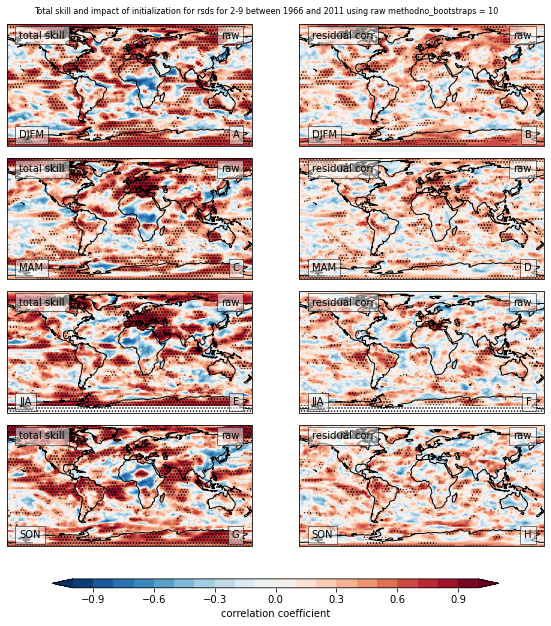

In [8]:
# # # set up a plots directory
# plots_dir = "/gws/nopw/j04/canari/users/benhutch/plots"

# # Now use the updated plotting function to plot the results
# plt_fnc.plot_raw_init_impact_subplots(arrays_list, values_list, variable,
#                                       seasons_list, forecast_range, method,
#                                       no_bootstraps, plots_dir)

plotting index:  0  for method:  raw
plotting index:  1  for method:  lagged
plotting index:  2  for method:  nao-matched


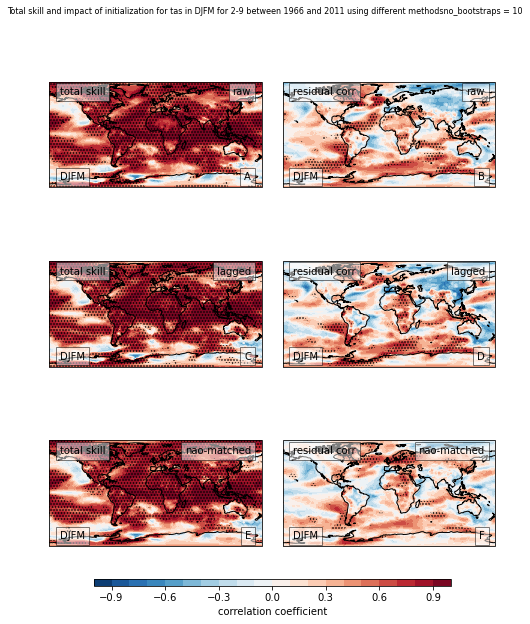

In [7]:
# Call the function to plot the subplots for the different methods
plt_fnc.plot_different_methods_same_season_var(arrays_list, values_list, variable,
                                               season, forecast_range, method_list,
                                               no_bootstraps, plots_dir,
                                               figsize_x=10, figsize_y=10)

In [7]:
# # Define a function to process the initialization benefit
# # Set up the args first
# # sigo = arrays["sigo"] ; sigo_resid = arrays["sigo_resid"]

# # Extract the arrays
# partial_r = arrays["partial_r"] ; corr1 = arrays["corr1"] 

# # # Process the initialization benefit
# # init_impact = pib_fnc.calculate_init_benefit(partial_r, sigo_resid,
# #                                              corr1, sigo)

['/gws/nopw/j04/canari/users/benhutch/bootstrapping/psl/global/DJFM/2-9/lagged/no_bootstraps_10/nens1_psl_global_DJFM_2-9.txt', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/psl/global/DJFM/2-9/lagged/no_bootstraps_10/nens2_psl_global_DJFM_2-9.txt', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/psl/global/DJFM/2-9/lagged/no_bootstraps_10/start_end_years_psl_global_DJFM_2-9.txt']
/gws/nopw/j04/canari/users/benhutch/bootstrapping/psl/global/DJFM/2-9/lagged/no_bootstraps_10/nens1_psl_global_DJFM_2-9.txt
/gws/nopw/j04/canari/users/benhutch/bootstrapping/psl/global/DJFM/2-9/lagged/no_bootstraps_10/nens2_psl_global_DJFM_2-9.txt
/gws/nopw/j04/canari/users/benhutch/bootstrapping/psl/global/DJFM/2-9/lagged/no_bootstraps_10/start_end_years_psl_global_DJFM_2-9.txt
['/gws/nopw/j04/canari/users/benhutch/bootstrapping/psl/global/DJFM/2-9/lagged/no_bootstraps_10/corr10_max_psl_global_DJFM_2-9.npy', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/psl/global/DJFM/2-9/lagged/no_bootstraps_1

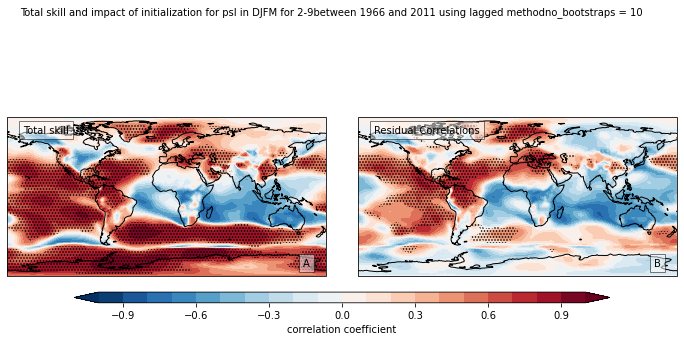

In [4]:
method = "lagged"
# Now we want to plot the initialization benefit alongside the raw field
# With significance levels shown by the stippling
# Extract the args
# Use the function to extract the arrays
path = f"{bootstrap_base_dir}/{variable}/{region}/{season}/" + \
                f"{forecast_range}/{method}/no_bootstraps_{no_bootstraps}"

# Use this path to extract the values from the txt file
values = pib_fnc.extract_values_from_txt(path, variable)

# Use this path to extract the arrays from the npy file
arrays = pib_fnc.load_arrays_from_npy(path, variable)

# Extract corr1 and partial_r
partial_r = arrays["partial_r"] ; corr1 = arrays["corr1"]
corr1_p = arrays["corr1_p"] ; partial_r_p = arrays["partial_r_p"]

# extract the values
nens1 = values["nens1"] ; nens2 = values["nens2"]
start_year = values["start_year"] ; end_year = values["end_year"]

# set up a plots directory
plots_dir = "/gws/nopw/j04/canari/users/benhutch/plots"

# If this directory doesn't exist, create it
if not os.path.exists(plots_dir):
    os.mkdir(plots_dir)

# run the function
plt_fnc.plot_raw_init_impact(corr1, corr1_p, partial_r, partial_r_p,
                                variable, season, forecast_range, method,
                                no_bootstraps, nens1, nens2, start_year,
                                end_year, plots_dir)

['/gws/nopw/j04/canari/users/benhutch/bootstrapping/psl/global/DJFM/2-9/nao-matched/no_bootstraps_10/nens1_psl_global_DJFM_2-9.txt', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/psl/global/DJFM/2-9/nao-matched/no_bootstraps_10/nens2_psl_global_DJFM_2-9.txt', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/psl/global/DJFM/2-9/nao-matched/no_bootstraps_10/start_end_years_psl_global_DJFM_2-9.txt']
/gws/nopw/j04/canari/users/benhutch/bootstrapping/psl/global/DJFM/2-9/nao-matched/no_bootstraps_10/nens1_psl_global_DJFM_2-9.txt
/gws/nopw/j04/canari/users/benhutch/bootstrapping/psl/global/DJFM/2-9/nao-matched/no_bootstraps_10/nens2_psl_global_DJFM_2-9.txt
/gws/nopw/j04/canari/users/benhutch/bootstrapping/psl/global/DJFM/2-9/nao-matched/no_bootstraps_10/start_end_years_psl_global_DJFM_2-9.txt
['/gws/nopw/j04/canari/users/benhutch/bootstrapping/psl/global/DJFM/2-9/nao-matched/no_bootstraps_10/corr10_max_psl_global_DJFM_2-9.npy', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/psl/glo

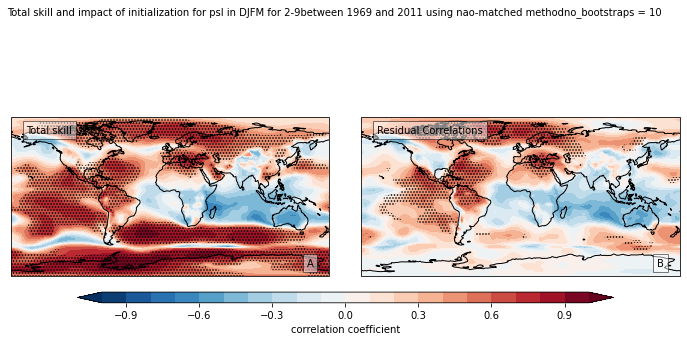

In [5]:
# Now for the other method
method = "nao-matched"

# Do the same thing
# Use the function to extract the arrays
path = f"{bootstrap_base_dir}/{variable}/{region}/{season}/" + \
                f"{forecast_range}/{method}/no_bootstraps_{no_bootstraps}"

# Use this path to extract the values from the txt file
values = pib_fnc.extract_values_from_txt(path, variable)

# Use this path to extract the arrays from the npy file
arrays = pib_fnc.load_arrays_from_npy(path, variable)

# Extract corr1 and partial_r
partial_r = arrays["partial_r"] ; corr1 = arrays["corr1"]
corr1_p = arrays["corr1_p"] ; partial_r_p = arrays["partial_r_p"]

# extract the values
nens1 = values["nens1"] ; nens2 = values["nens2"]
start_year = values["start_year"] ; end_year = values["end_year"]

# set up a plots directory
plots_dir = "/gws/nopw/j04/canari/users/benhutch/plots"

# If this directory doesn't exist, create it
if not os.path.exists(plots_dir):
    os.mkdir(plots_dir)
    

# run the function
plt_fnc.plot_raw_init_impact(corr1, corr1_p, partial_r, partial_r_p,
                                variable, season, forecast_range, method,
                                no_bootstraps, nens1, nens2, start_year,
                                end_year, plots_dir)
